% Dazhong Li
# Dissipation Test  Data processing

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import exp
import os
import matplotlib.patches as mpatches

## Import data and input


In [2]:
path =r'G:\Actual Job\211036\11-00 Calculations\11-02 Seawall Design\Post 2016 GI\01 GI Received\20180105\HKBCF Portion\CH4900\CH4900-CPT3(1)'
os.chdir(path)
filename = [fl for fl in os.listdir() if 'DIS_MMXP.asc' in fl]

In [3]:
filename

['CH4900-CPT3(1)_1_DIS_MMXP.asc',
 'CH4900-CPT3(1)_2_DIS_MMXP.asc',
 'CH4900-CPT3(1)_DIS_MMXP.asc']

# We will fit the curve with an exponential function 
Such a function would work fine because when $x->\infty, u -> constant $
$$ u = a\cdot e^{-b\cdot x} +c$$

In [4]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [5]:
# direct fit the data will cause some problems, we normalise the data first before feeding to the curve fitting 
def fit_data(df,cut_off):
    x_data = np.array(df[df.Time>t_cutoff].Time).copy()
    y_data = np.array(df[df.Time>t_cutoff]['Piezometric Head']).copy()
    #It is better that we scale the data before do the curve fitting
    x_scale = x_data.max(); y_scale = y_data.min()
    x_data = x_data/x_scale; y_data=y_data/y_scale
    popt, pcov = curve_fit(func, x_data, y_data)
    return popt, pcov,x_scale, y_scale

In [49]:
def plot_data(df,popt,pcov,x_scale,y_scale,hour):
    figure_title = name + ' Dissipation Test at {0:2.2f}mPD'.format(start_level-depth)+ "\n (Test Lasted for {:.1f} hours)".format(hour)
    figure_name =name + ' Dissipation Test at {0:2.2f}mPD'.format(start_level-depth)+ '.pdf'
    x_max_fitted = 50000 
    x_fitted = np.arange(1,x_max_fitted/x_scale,0.1)
    y_fitted = func(x_fitted,*popt) 
    fig = plt.figure(figsize=(7.27,11.69))
    fig.suptitle(figure_title,fontsize=20)
    ax = fig.add_subplot(211)
    ax_log = fig.add_subplot(212)
    df.plot(x = 'Time',y='Piezometric Head', logx=True,ax = ax_log)
    df.plot(x = 'Time',y='Piezometric Head', logx=False,ax = ax)
    ax.set_ylabel('Piezometric Head(mPD)')
    ax.set_xlabel('Time[s]')
    ax_log.set_ylabel('Piezometric Head(mPD)')
    ax_log.set_xlabel('Time[s]')
    ax.grid();ax_log.grid()
    
    x_hydro = [df.Time.min(),df.Time.max()]
    y_hydro = [1.2,1.2]
    ax.plot(x_fitted*x_scale,y_fitted*y_scale,'r--',label='Fitted Line')
    ax_log.plot(x_fitted*x_scale,y_fitted*y_scale,'r--',label='Fitted Line')
    x1 = x_max_fitted,
    y1 = y_scale*func(x_max_fitted,*popt)
    el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
    #ax_log.add_artist(el)
    txt_hydrostatic_level = '{0:2.1f}mPD'.format(y_scale*func(x_max_fitted,*popt))
    #import pdb; pdb.set_trace()
    ax_log.annotate(txt_hydrostatic_level, xy =(50000,y1),xytext=(4000.0,30.0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
    ax.set_xlim([0,x_max_fitted])
    ax_log.set_xlim([0,x_max_fitted])
    ax.set_ylim([0,100])
    ax_log.set_ylim([0,100])
    ax.legend();ax_log.legend()
    fig.savefig(figure_name+'.pdf')

    #ax.plot(x_hydro,y_hydro,'b--',label='Hydrostatic Level')
    ax.legend()


Test lasted for 7.06 hours
what iss the level of ground6.08
Test lasted for 5.51 hours
what iss the level of ground6.08
Test lasted for 7.02 hours
what iss the level of ground6.08


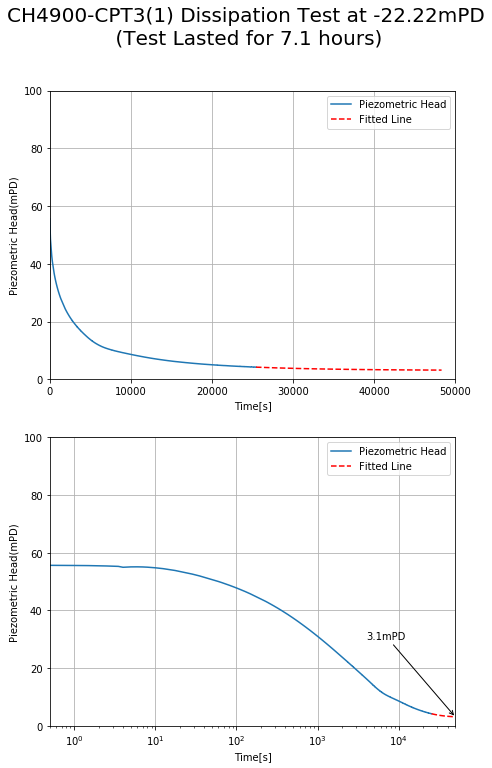

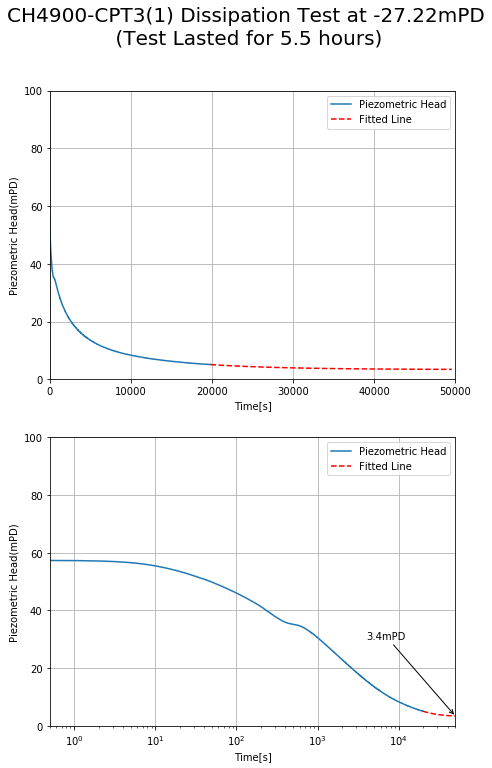

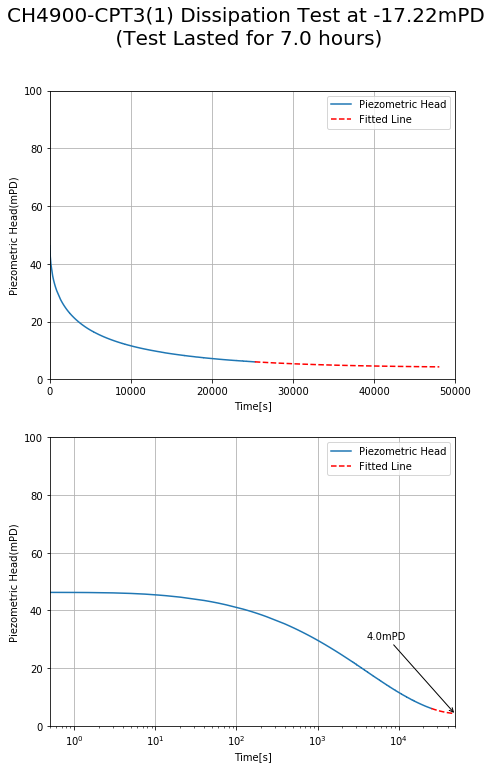

In [60]:
#%%writefile CH4900_dissipation_test.py
for fl in filename:
    data_block=[]
    with open(fl,'r') as infile:
        for line_number,line in enumerate(infile):
            if  ' Data table:' in line:
                data_block.append(line_number)
    for i,blk in enumerate(data_block):
        if len(data_block)>i+1:
            nrows = data_block[i+1]-data_block[i]-47
            df = pd.read_csv(fl,skiprows=blk+3,nrows = nrows,delimiter = r"\s+") 
        else:
            df = pd.read_csv(fl,skiprows=blk+3,delimiter = r"\s+") 
        df.columns=['Rec','Depth','Time','Pore2','Cone']
        print('Test lasted for {:.2f} hours'.format(df.Time.max()/60/60))
        name = fl.split('_')[0]
        start_level = float(input('what iss the level of ground'))
        water_table = 1.2
        depth = df.Depth.max()
        df.set_index('Time')
        df['head'] = df['Pore2']*1000/10
        df['Piezometric Head'] = df['head']-(water_table-(start_level-depth))
        t_cutoff = np.array(df.Time)[int(len(np.array(df.Time))/4)*-1]
        popt, pcov,xscale,yscale = fit_data(df,t_cutoff)
        plot_data(df,popt,pcov,xscale,yscale,df.Time.max()/60/60) 

In [ ]:

df

In [ ]:
np.array(df.Time)[-1000]

In [ ]:
int(len(np.array(df.Time))/3)

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()
